## import libarary

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## import Dataset

In [22]:
df=pd.read_csv('student_data.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Data information

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [24]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [25]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [26]:
df.shape

(30641, 15)

# Exploratory Data Analysis

In [27]:
# drop nuname column
df.drop(labels='Unnamed: 0',axis=1)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


<Axes: ylabel='Gender'>

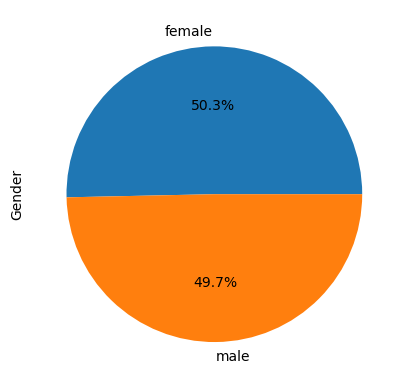

In [28]:
# gender distribution
df.groupby('Gender')['Gender'].count().plot(kind='pie',autopct='%0.01f%%')

[Text(0, 0, '15424'), Text(0, 0, '15217')]

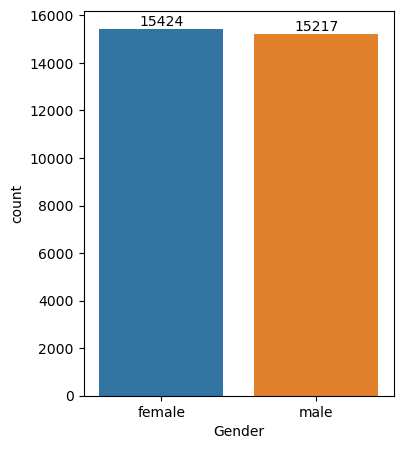

In [34]:
plt.figure(figsize=(4,5))
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])

#### From the chart above, we analyze that the number of female is greater than that of male.

In [31]:
df.groupby('ParentEduc')[['MathScore','ReadingScore','WritingScore']].mean()

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


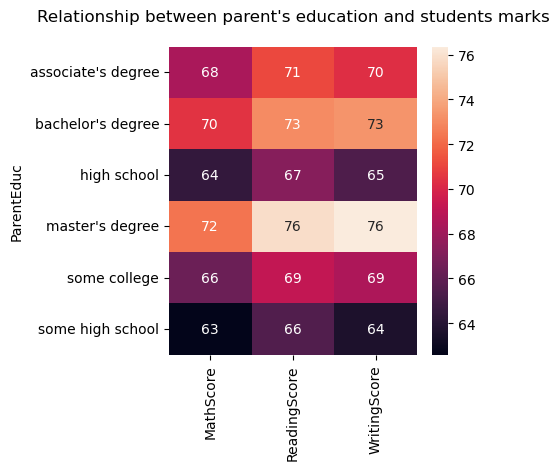

In [83]:
plt.figure(figsize=(4,4))
a=df.groupby('ParentEduc')[['MathScore','ReadingScore','WritingScore']].mean()
plt.title("Relationship between parent's education and students marks\n")
sns.heatmap(a,annot=True)
plt.show()

#### From the above chart we have concluded that the education of the parents have a good impact on students marks.

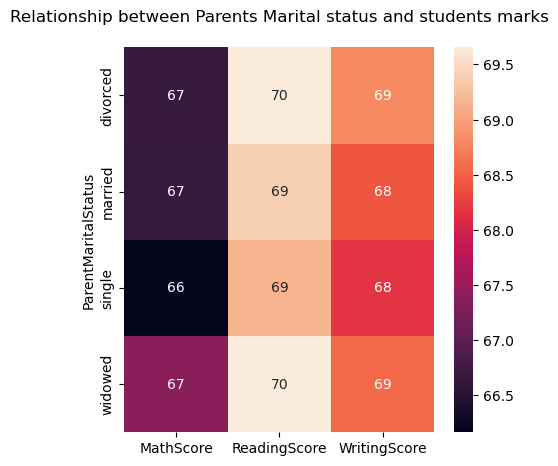

In [82]:
plt.figure(figsize=(5,5))
sns.heatmap(data=(df.groupby('ParentMaritalStatus')[['MathScore','ReadingScore','WritingScore']].mean()),annot=True)
plt.title('Relationship between Parents Marital status and students marks\n')
plt.show()

#### From obove chart we concluded that the parents marital status have a no/negligible impact on students marks.

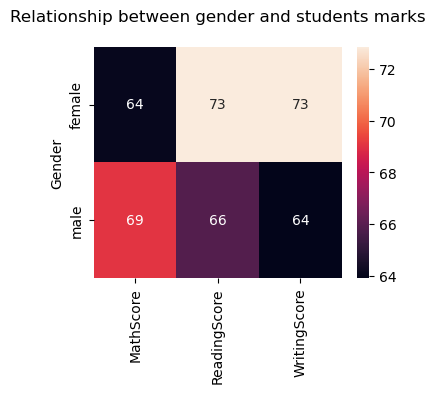

In [81]:
plt.figure(figsize=(4,3))
sns.heatmap((df.groupby(['Gender'])[['MathScore','ReadingScore','WritingScore']].mean()),annot=True)
plt.title('Relationship between gender and students marks\n')
plt.show()

#### from the above chart, it can be concluded that females outperform males in reading and writitng whereas males excel in mathmatics compare to females.

### Average Scores by Test Preparation and Gender

In [153]:
df.groupby(['TestPrep','Gender'])[['MathScore','ReadingScore','WritingScore']].mean()

MathScore  ReadingScore  WritingScore
TestPrep  Gender                                       
completed female  66.953150     76.959252     78.825394
          male    72.249231     70.371077     70.407795
none      female  62.511581     70.636171     69.647594
          male    67.399957     63.445378     60.511754

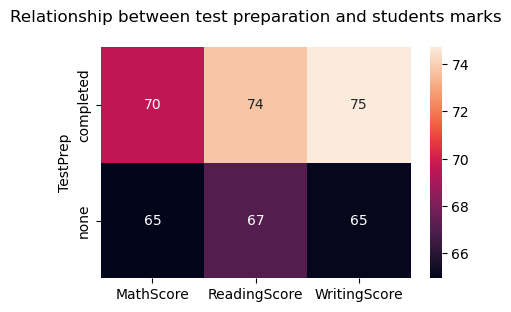

In [147]:
plt.figure(figsize=(5,3))
sns.heatmap(data=df.groupby(['TestPrep'])[['MathScore','ReadingScore','WritingScore']].mean(),annot=True)
plt.title('Relationship between test preparation and students marks\n')
plt.show()

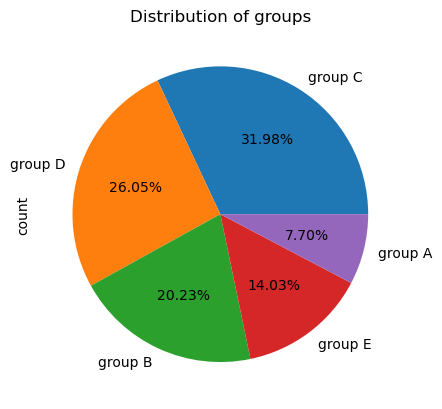

In [91]:
df['EthnicGroup'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Distribution of groups')
plt.show()

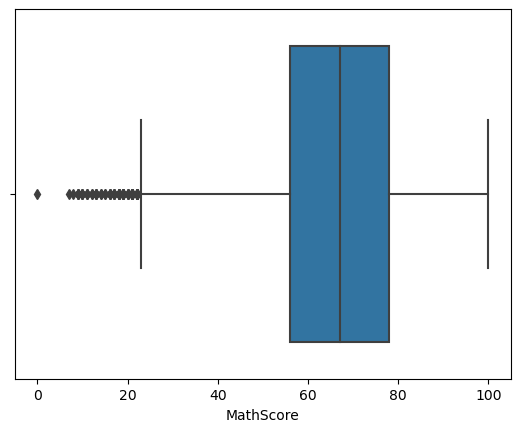

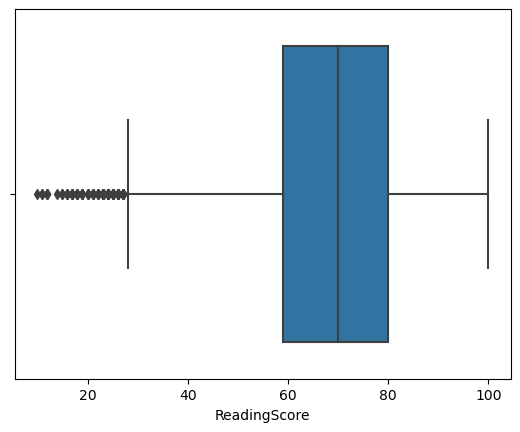

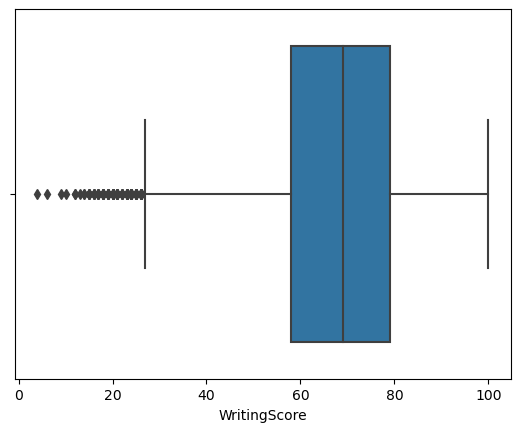

In [137]:
list=['MathScore','ReadingScore','WritingScore']
for i in list:
    sns.boxplot(data=df,x=i)
    plt.show()
    

#### Average Scores by Ethnic Group and Gender

In [155]:
df.groupby(['EthnicGroup','Gender'])[['MathScore','ReadingScore','WritingScore']].mean()

MathScore  ReadingScore  WritingScore
EthnicGroup Gender                                       
group A     female  60.696349     70.438112     69.913624
            male    65.343978     63.047445     60.475365
group B     female  61.030754     70.824265     70.312268
            male    66.028601     63.704220     61.336240
group C     female  62.207024     71.887492     71.448082
            male    67.191998     64.978474     62.536856
group D     female  65.227707     74.033439     75.436306
            male    70.126640     66.698795     66.305221
group E     female  72.813851     77.482318     76.916503
            male    77.822444     70.970574     68.372070

Text(0.5, 1.0, 'relationship between Ethnic group and students marks')

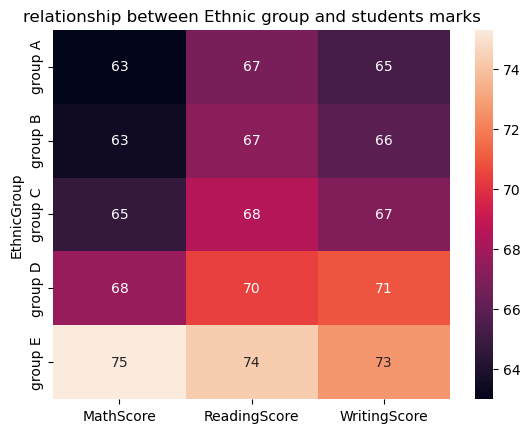

In [161]:
sns.heatmap(data=df.groupby(['EthnicGroup'])[['MathScore','ReadingScore','WritingScore']].mean(),annot=True)
plt.title('relationship between Ethnic group and students marks')

####  Based on the chart, it can be concluded that students in Group E achieved higher scores compared to other classes.